In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
# 다중 선형 회귀 분석

In [2]:
# 데이터 불러오기
boston = pd.read_csv('./Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [4]:
# target 컬럼 제거
boston_data = boston.drop(['Target'], axis = 1)

In [5]:
# CRIM, RM, LSTAT ~ TARGET

In [10]:
x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [11]:
# 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant="add")

In [12]:
# 회귀모델 적합
multi_model = sm.OLS(boston['Target'], x_data1)
fitted_multi_model = multi_model.fit()

In [13]:
# summary 함수를 통해 결과 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          1.01e-112
Time:                        15:36:37   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# 다중 선형 회귀 모델의 회귀 계수
fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [16]:
# 행렬 연산을 통해 beta 구하기 -> (X`X)-1X`y
from numpy import linalg

In [18]:
ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba, x_data1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [19]:
# y_hat 구하기
pred = fitted_multi_model.predict(x_data1)

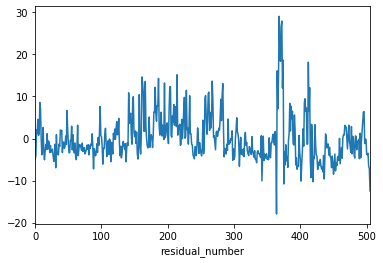

In [20]:
# residual plot
fitted_multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

In [3]:
# CRIM, RM, LSTAT, B, TAX, AGE, ZN, NOX, INDUS 변수를 통한 다중 선형 회귀 분석

In [4]:
x_data2 = boston[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
x_data2.head()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [24]:
x_data2.values

array([[6.3200e-03, 6.5750e+00, 4.9800e+00, ..., 1.8000e+01, 5.3800e-01,
        2.3100e+00],
       [2.7310e-02, 6.4210e+00, 9.1400e+00, ..., 0.0000e+00, 4.6900e-01,
        7.0700e+00],
       [2.7290e-02, 7.1850e+00, 4.0300e+00, ..., 0.0000e+00, 4.6900e-01,
        7.0700e+00],
       ...,
       [6.0760e-02, 6.9760e+00, 5.6400e+00, ..., 0.0000e+00, 5.7300e-01,
        1.1930e+01],
       [1.0959e-01, 6.7940e+00, 6.4800e+00, ..., 0.0000e+00, 5.7300e-01,
        1.1930e+01],
       [4.7410e-02, 6.0300e+00, 7.8800e+00, ..., 0.0000e+00, 5.7300e-01,
        1.1930e+01]])

In [5]:
x_data2_ = sm.add_constant(x_data2, has_constant="add")

D:\Anaconda3\envs\opensource\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
multi_model2 = sm.OLS(boston[['Target']], x_data2)
fitted_multi_model2 = multi_model2.fit()

In [8]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1084.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                   3.94e-320
Time:                        15:31:43   Log-Likelihood:                         -1567.3
No. Observations:                 506   AIC:                                      3153.
Df Residuals:                     497   BIC:                                      3191.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0408      0.036     -1.143      0.254      -0.111       0.029
RM             4.3895      0.259     16.933      0.000       3.880       4.899
LSTAT         -0.6202      0.049    -12.606      0.000      -0.717      -0.524
B              0.0063      0.003      2.346      0.019       0.001       0.012
TAX           -0.0063      0.002     -2.613      0.009      -0.011      -0.002
AGE            0.0298      0.014      2.142      0.033       0.002       0.057
ZN             0.0285      0.013      2.129      0.034       0.002       0.055
NOX            1.0449      3.610      0.289      0.772      -6.047       8.137
INDUS          0.0332      0.065      0.508      0.612      -0.095       0.162
==============================================================================
Omnibus:                      187.681   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.790
Skew:                           1.665   Prob(JB):                    2.77e-160
Kurtosis:                       7.875   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
fitted_multi_model2.params

CRIM    -0.040790
RM       4.389503
LSTAT   -0.620228
B        0.006286
TAX     -0.006348
AGE      0.029831
ZN       0.028503
NOX      1.044852
INDUS    0.033181
dtype: float64

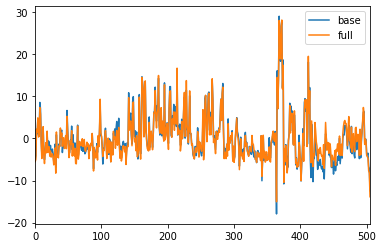

In [14]:
# **base 모델과 full 모델의 잔차 비교
fitted_multi_model.resid.plot(label="base")
fitted_multi_model2.resid.plot(label="full")
plt.legend()

In [15]:
# 상관계수 & 산점도를 통한 다중 공선성 확인

In [16]:
# 상관 행렬
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


In [17]:
# 상관 행렬 시각화
import seaborn as sns

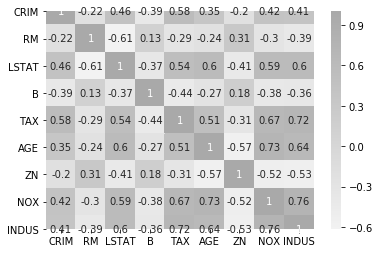

In [18]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

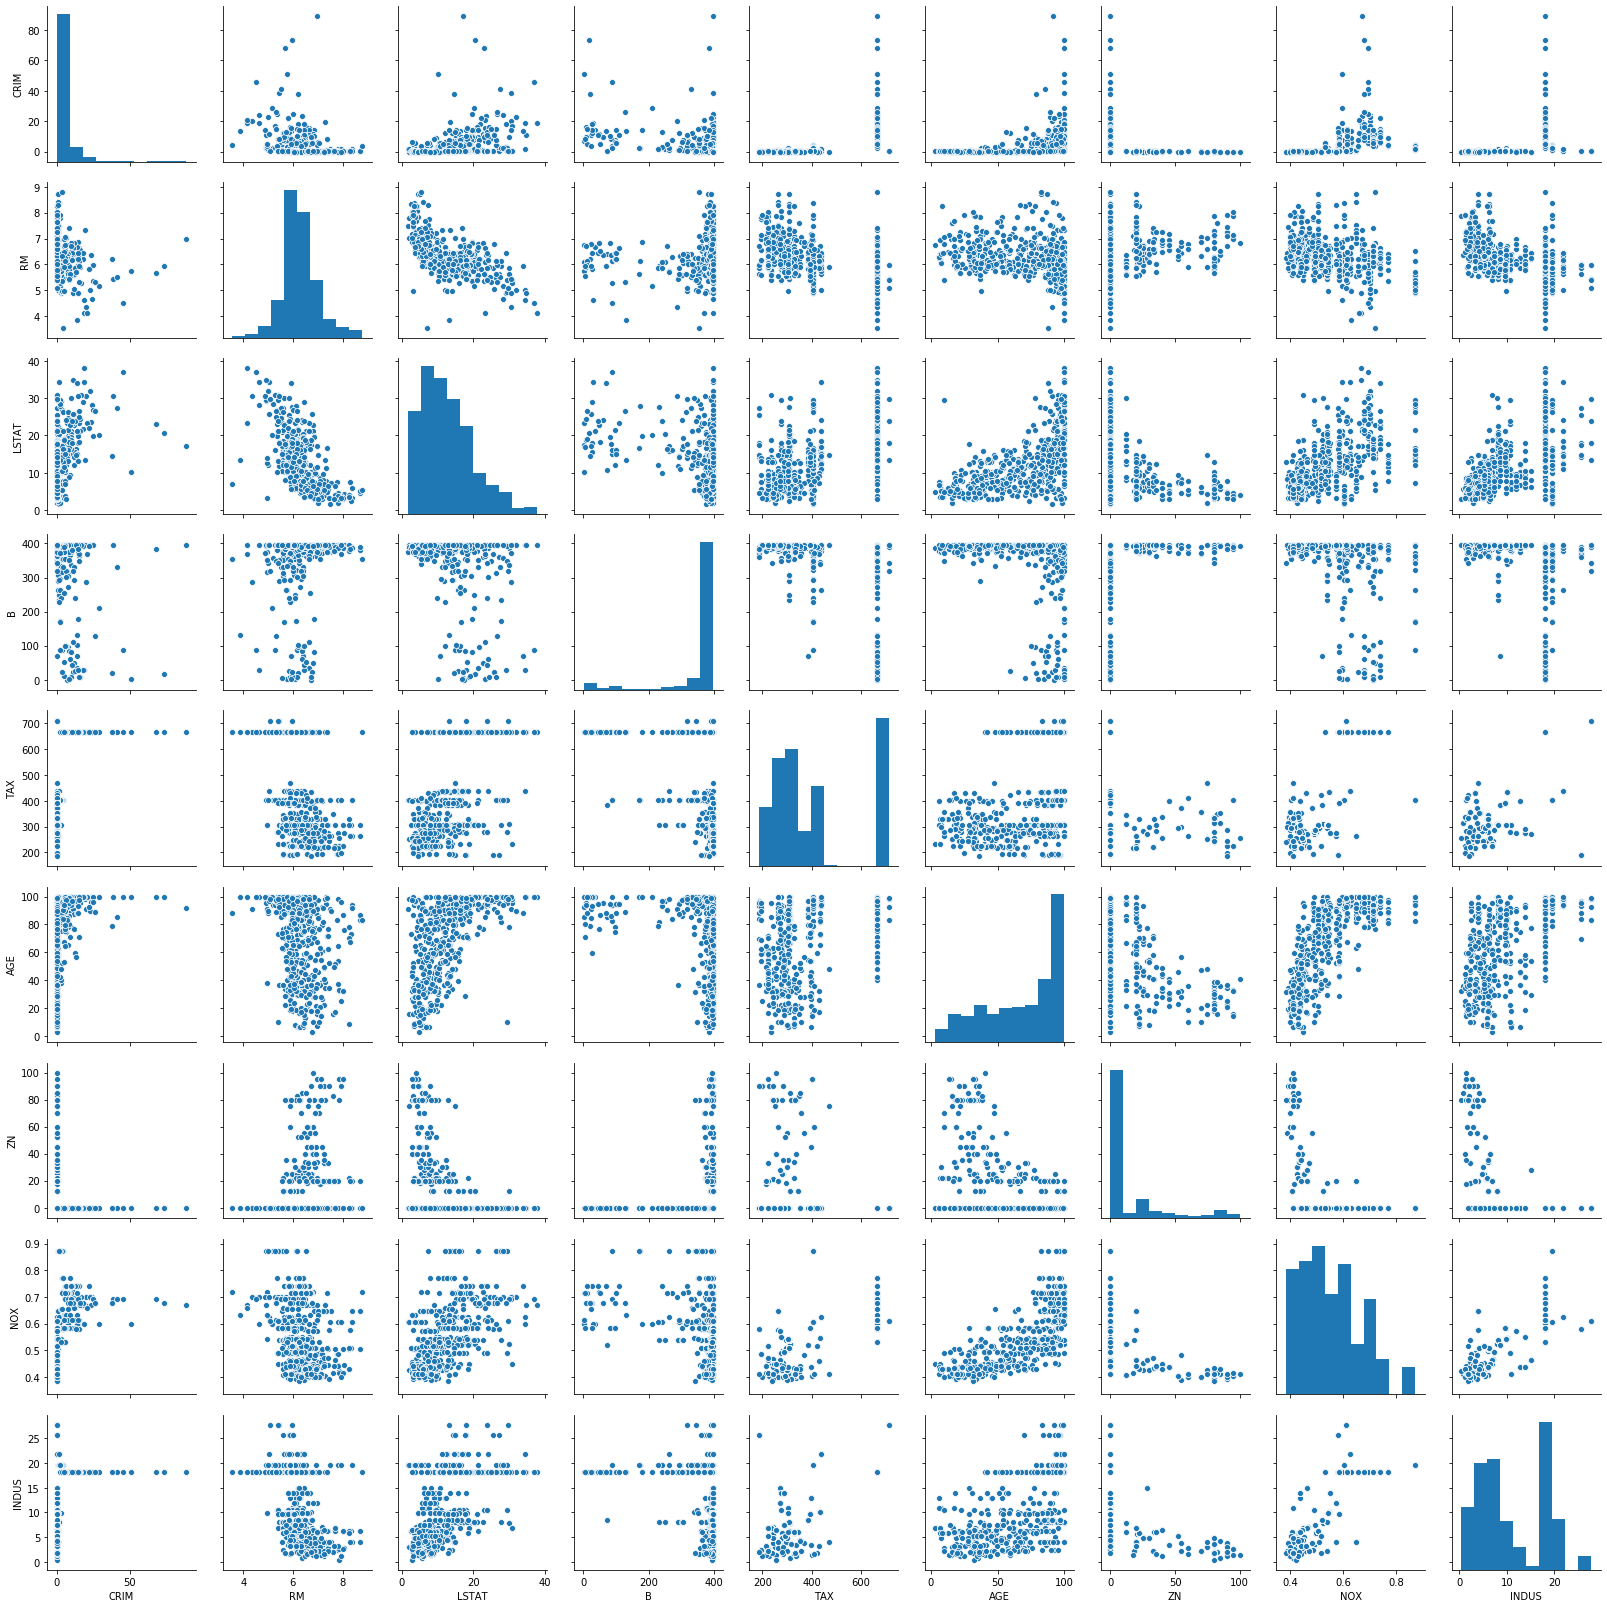

In [19]:
# 변수별 산점도 시각화
sns.pairplot(x_data2)
plt.show()

In [21]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['Features'] = x_data2.columns

In [23]:
vif

,VIF Factor,Features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


In [25]:
# NOX 변수 제거 후, VIF 확인
vif = pd.DataFrame()
x_data3 = x_data2.drop('NOX', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['Features'] = x_data3.columns
vif

,VIF Factor,Features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [26]:
# RM 변수 제거 후, VIF 롹인
vif = pd.DataFrame()
x_data4 = x_data3.drop('RM', axis = 1)
vif['VIF Factor'] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['Features'] = x_data4.columns
vif

,VIF Factor,Features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [28]:
# nox 변수 제거한 데이터(x_data3) 상수항 추가 후 회귀 모델 적합
x_data3 = sm.add_constant(x_data3, has_constant="add")
vif_model = sm.OLS(boston['Target'], x_data3)
vif_fitted_model = vif_model.fit()
vif_fitted_model.summary()

D:\Anaconda3\envs\opensource\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Fri, 10 Jul 2020   Prob (F-statistic):          7.62e-112
Time:                        16:41:53   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# RM 변수 제거한 데이터(x_data4) 상수항 추가 후 회귀 모델 적합
x_data4 = sm.add_constant(x_data4, has_constant="add")
vif_model2 = sm.OLS(boston['Target'], x_data4)
vif_fitted_model2 = vif_model2.fit()
vif_fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           5.53e-89
Time:                        16:42:35   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# 학습 / 검증 데이터 분할
from sklearn.model_selection import train_test_split

In [31]:
X = x_data2_
y = boston['Target']
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354,) (152,)


In [32]:
# train_x 회귀 모델 적합
fit_1 = sm.OLS(train_y, train_x)
fit_1 = fit_1.fit()

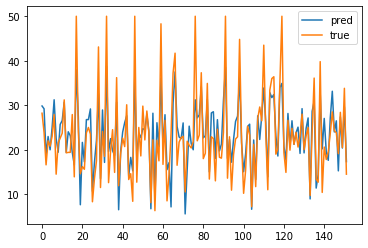

In [33]:
# 검증 데이터에 대한 예측 값과 true값 비교
plt.plot(np.array(fit_1.predict(test_x)), label="pred")    # 예측 값
plt.plot(np.array(test_y), label="true")    # 실제 값
plt.legend()
plt.show()

In [35]:
# x_data3와 x_data4의 학습, 검증 데이터 분할
X = x_data3
y = boston['Target']
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [36]:
X = x_data4
y = boston['Target']
train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [37]:
# x_data3, x_data4 회귀 모델 적합
fit_2 = sm.OLS(train_y2, train_x2)
fit_2 = fit_2.fit()
fit_3 = sm.OLS(train_y3, train_x3)
fit_3 = fit_3.fit()

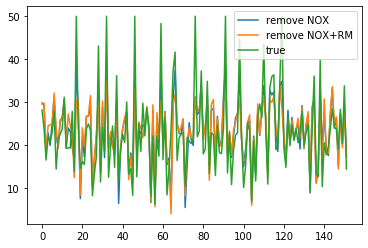

In [38]:
# true 값과 예측 값 비교
plt.plot(np.array(fit_2.predict(test_x2)), label="remove NOX")
plt.plot(np.array(fit_3.predict(test_x3)), label="remove NOX+RM")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

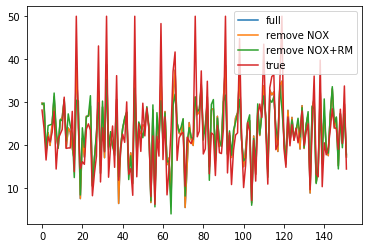

In [41]:
# full 모델까지 추가해서 비교
plt.plot(np.array(fit_1.predict(test_x)), label="full")
plt.plot(np.array(fit_2.predict(test_x2)), label="remove NOX")
plt.plot(np.array(fit_3.predict(test_x3)), label="remove NOX+RM")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

In [42]:
# MSE를 통한 검증데이터에 대한 성능 비교
from sklearn.metrics import mean_squared_error

In [44]:
# full model
mean_squared_error(y_true=test_y, y_pred=fit_1.predict(test_x))

26.148631468819858

In [45]:
# except NOX
mean_squared_error(y_true=test_y, y_pred=fit_2.predict(test_x2))

26.140062609846407

In [46]:
# except NOX, RM
mean_squared_error(y_true=test_y, y_pred=fit_3.predict(test_x3))

38.7884531791283